## Grupo 11
Integrantes:
- Bruno Saobya
- Esther Dagir
- Lucca Barufatti
- João Zsigmond

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Questão 1

In [11]:
'Inforções dadas a respeito das aleta'

T_superficie = 100
T_ambiente = 25
raio = 12e-3
comprimento = 168e-3

h = 10
k = 150

### Cálculos

In [12]:
diametro = raio * 2
perimetro = math.pi * diametro
area = (math.pi*diametro**2)/4

difTemperature = T_superficie - T_ambiente
m = math.sqrt((h*perimetro)/(k*area))
coshMl = math.cosh(m*comprimento)
sinhMl = math.sinh(m*comprimento)
hMk = h/(m*k)
distTemp = (math.cosh(0) + hMk*math.sinh(0))/(coshMl + hMk*sinhMl)

TL = distTemp * difTemperature + T_ambiente

### Grafico da temperatura

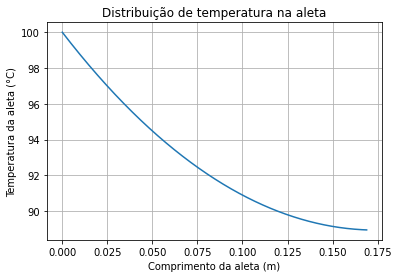

Temperatura na extremidade da aleta: 88.95 °C


In [16]:
listaX = np.arange(0, comprimento+0.001, 1e-4)
listaT = []

for i in listaX:
    dist_temp = (math.cosh(m*(comprimento - i)) + hMk*math.sinh(m*(comprimento - i)))/(math.cosh(m*comprimento) + hMk*math.sinh(m*comprimento))
    T_novo = dist_temp* difTemperature + T_ambiente
    listaT.append(T_novo)

plt.plot(listaX, listaT)
plt.title('Distribuição de temperatura na aleta')
plt.xlabel('Comprimento da aleta (m)')
plt.ylabel('Temperatura da aleta (°C)')
plt.grid(True)
plt.show()

print("Temperatura na extremidade da aleta: {:.2f} °C".format(TL))

In [22]:
# Transferência de Calor

M = math.sqrt(h * perimetro * k * area) * difTemperature
q = M * (sinhMl + hMk * coshMl)/(coshMl + hMk * sinhMl)

print("Transferência de calor = {:.2f} W".format(q))

Transferência de calor = 8.87 W


In [23]:
# Eficiência

na = q/(h * (area + (2 * raio * math.pi * comprimento))*difTemperature)

print("Eficiência = {:.2f}%".format(na*100))

Eficiência = 90.12%


In [25]:
# Efetividade

ea = q/(h * (math.pi * raio**2) * difTemperature)

print("Efetividade: {:.2f}".format(ea))

Efetividade: 26.13


In [26]:
# Caso de aleta infinita

x = (comprimento*M)/q

print("O comprimento da aleta infinita deveria ser {:.2f} metros".format(x))

O comprimento da aleta infinita deveria ser 0.32 metros


## Questão 2

A taxa de transferencia de calor com o ambiente aumentaria conforme a área aumentasse.

A taxa de transferência de calor irá ter um aumento muito pequeno.